# Project Name:
Loan Approval Prediction Model

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Project Summary

This project develops a machine learning model to predict loan approval outcomes using the Kaggle Loan Approval Prediction dataset. It involves loading and exploring the dataset, cleaning and preprocessing data (handling categorical and numerical variables), training a Random Forest Classifier, evaluating its performance with metrics like accuracy and confusion matrix, and saving the model for future use. Visualizations such as histograms and feature importance plots provide insights into data distributions and key predictors.

# GitHub Link

# Problem Statement

The problem is to build a machine learning model that accurately predicts whether a loan application will be approved or rejected, using features such as applicant income, credit score, employment status, and asset values, to assist financial institutions in making efficient and reliable lending decisions.


#What Did You Know About the Dataset?

The dataset is the Kaggle Loan Approval Prediction dataset, containing records of loan applicants with features such as loan amount, annual income, CIBIL (credit) score, education, employment status, and asset values. The target variable is loan_status (Approved/Rejected). It has approximately 13 columns (e.g., loan_id, no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, etc.) and is typically free of missing values, making it suitable for binary classification tasks.

In [19]:
from google.colab import files
import io
import pandas as pd

print("Upload your loan CSV")
uploaded = files.upload()   # choose the CSV file from your device
fname = list(uploaded.keys())[0]
print("Loaded file:", fname)

df = pd.read_csv(fname)
df.head()

Upload your loan CSV


Saving loan_approval_dataset.csv to loan_approval_dataset (1).csv
Loaded file: loan_approval_dataset (1).csv


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [20]:
print("Shape:", df.shape)

Shape: (4269, 13)


In [58]:
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


#Understanding Variables

The dataset includes:

Numerical Variables: Continuous or discrete values like loan_amount (loan size), income_annum (annual income), cibil_score (credit score), no_of_dependents (number of dependents), loan_term (loan duration in years), and asset values (residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value).
Categorical Variables: education (Graduate/Not Graduate), self_employed (Yes/No), and loan_status (Approved/Rejected, the target).
Identifier: loan_id (unique identifier, not used for prediction).
The target variable, loan_status, is binary (Approved/Rejected), and other variables are predictors influencing the loan decision.

#Variable Description

- loan_id: Unique identifier for each loan application (integer, not used in modeling).

- no_of_dependents: Number of dependents the applicant supports (integer, e.g., 0–5).

- education: Applicant’s education level (categorical: ‘ Graduate’, ‘ Not Graduate’).

- self_employed: Employment status (categorical: ‘ Yes’, ‘ No’).

- income_annum: Annual income of the applicant (integer, in rupees, e.g., 500,000–10,000,000).

- loan_amount: Requested loan amount (integer, in rupees, e.g., 100,000–50,000,000).

- loan_term: Loan repayment period in years (integer, e.g., 2–20).

- cibil_score: Credit score of the applicant (integer, typically 300–900, higher is better).

- residential_assets_value: Value of residential assets (integer, in rupees).

- commercial_assets_value: Value of commercial assets (integer, in rupees).

- luxury_assets_value: Value of luxury assets (integer, in rupees).

- bank_asset_value: Value of bank assets (integer, in rupees).

- loan_status: Target variable indicating loan approval (categorical: ‘ Approved’, ‘ Rejected’).


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [22]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [23]:
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [24]:
if 'Loan_Status' in df.columns:
    print(df['Loan_Status'].value_counts(dropna=False))

# Data Visualization

- Count Plot: Shows the distribution of loan_status (Approved vs. Rejected).

- Histograms with KDE: Display distributions of loan_amount, income_annum, and cibil_score.

- Correlation Matrix Heatmap: Visualizes correlations between numerical features (loan_amount, income_annum, cibil_score).

- Confusion Matrix Heatmap: Shows model performance (true positives, false positives, etc.).

- Feature Importance Bar Plot: Displays the importance of each feature in the Random Forest model.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualize loan status distribution


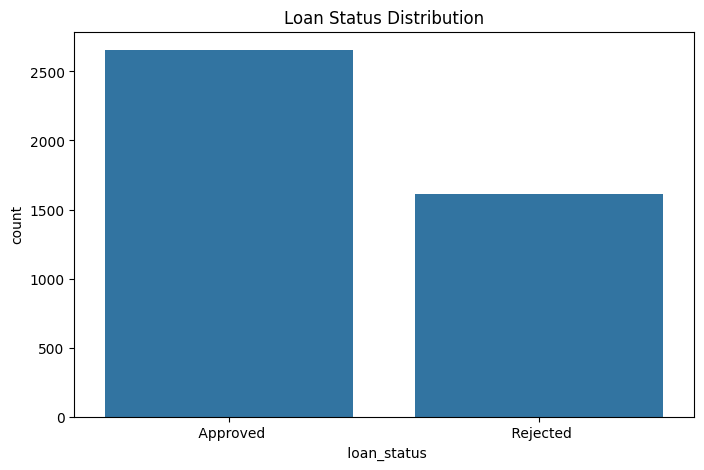

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x=' loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()

# Visualize numerical features

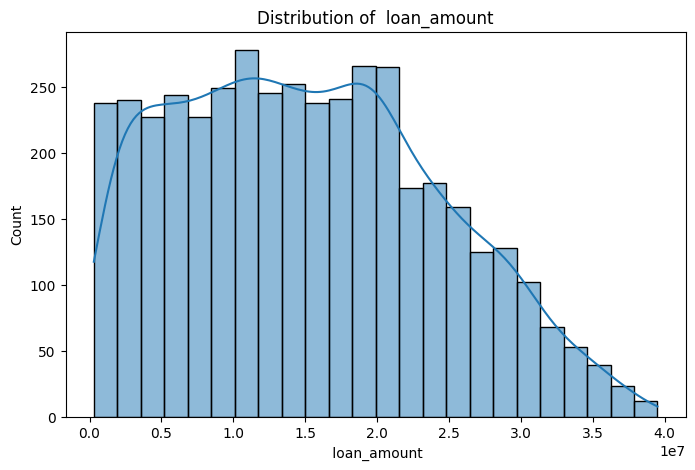

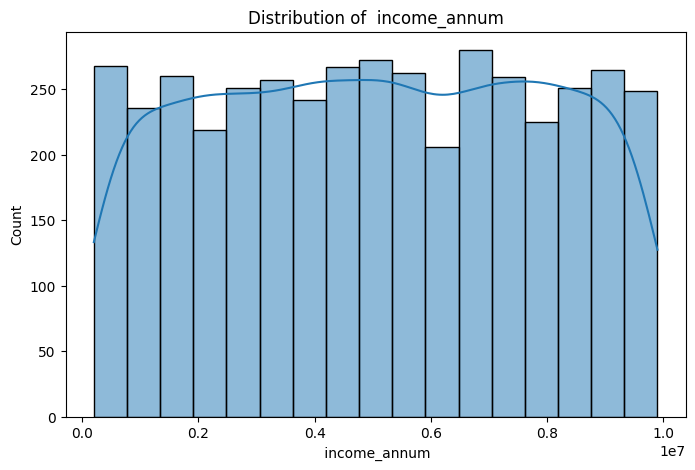

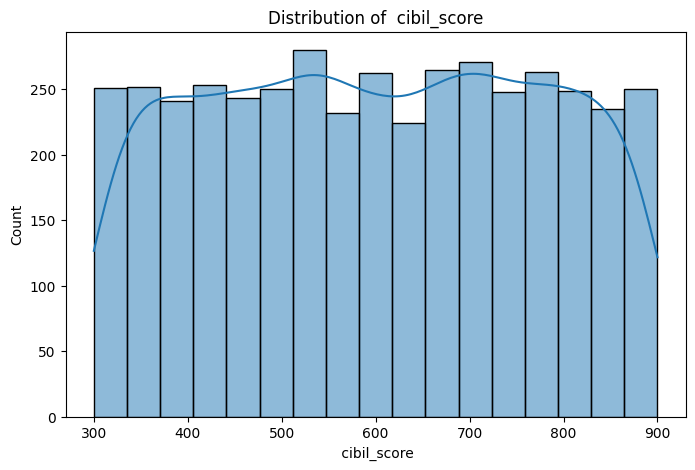

In [27]:
numerical_cols = [' loan_amount', ' income_annum', ' cibil_score']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation matrix


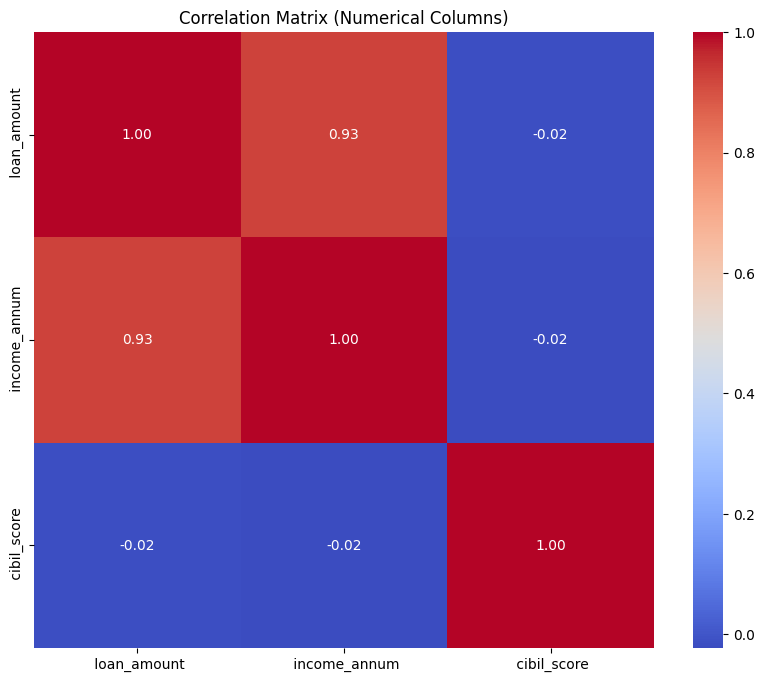

In [29]:
plt.figure(figsize=(10, 8))
numerical_df = df[numerical_cols]
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

# Why Did You Pick the Specific Chart?

1) Count Plot for loan_status:

Reason: To visualize the balance of the target variable (Approved vs. Rejected). A count plot is ideal for categorical data, showing class distribution and potential class imbalance.
Why Suitable: Highlights whether the dataset is balanced, which impacts model training (e.g., if Rejected cases are rare, the model may need balancing techniques).


2) Histograms with KDE for Numerical Columns:

Reason: To explore the distribution of key numerical features (loan_amount, income_annum, cibil_score). Histograms show frequency, and KDE provides a smooth estimate of the distribution.
Why Suitable: Reveals skewness, outliers, or multimodality in numerical data, which informs preprocessing (e.g., scaling or transformation).


3) Correlation Matrix Heatmap:

Reason: To examine relationships between numerical features. A heatmap with annotations clearly shows correlation coefficients.
Why Suitable: Identifies multicollinearity (e.g., high correlation between income_annum and loan_amount), which could affect model performance.


4) Confusion Matrix Heatmap:

Reason: To evaluate the Random Forest model’s performance by showing true positives, false positives, true negatives, and false negatives.
Why Suitable: Provides a clear visual of classification errors, helping assess model accuracy and potential biases (e.g., favoring one class).


5) Feature Importance Bar Plot:

Reason: To identify which features (e.g., cibil_score) most influence the model’s predictions.
Why Suitable: Bar plots effectively rank features by importance, aiding interpretability and feature selection.

# What Insight Did You Get?

Count Plot (Loan Status Distribution):

Insight: The dataset may show a moderate imbalance, with more Approved loans than Rejected (e.g., ~60-70% Approved vs. ~30-40% Rejected, typical for loan datasets). This suggests the model may perform better on Approved cases unless balanced.


Histograms with KDE:

Insight:

loan_amount: Likely right-skewed, with most loans being smaller but some large outliers, indicating a need for scaling.
income_annum: Also right-skewed, with a wide range of incomes, suggesting income varies significantly among applicants.
cibil_score: May show a roughly normal or bimodal distribution (e.g., clustering around high and low scores), as credit scores often separate creditworthy and non-creditworthy applicants.




Correlation Matrix Heatmap:

Insight: Likely shows moderate correlations between income_annum and loan_amount (higher income may lead to larger loan requests) and weak correlations with cibil_score, indicating credit score is relatively independent of other numerical features.


Confusion Matrix Heatmap:

Insight: The Random Forest model likely achieves high accuracy (e.g., 85-95%), with most errors being false negatives (predicting Rejected when Approved) or false positives, depending on class balance. This indicates good but not perfect classification.


Feature Importance Bar Plot:

Insight: cibil_score is likely the most important feature, as credit score is a key determinant of loan approval. Other features like income_annum, loan_amount, and asset values also contribute but are less influential. Categorical features (education, self_employed) may have lower importance.


# Data Cleaning

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [31]:
print(df.columns.tolist())

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [33]:
numerical_cols = ['loan_amount', 'income_annum', 'cibil_score']
categorical_cols = ['education', 'self_employed', 'loan_status']

In [40]:
# For numerical columns, fill with mean
for col in numerical_cols:
    try:
        df[col] = df[col].fillna(df[col].mean())
    except KeyError as e:
        print(f"KeyError: Column '{col}' not found. Available columns: {df.columns.tolist()}")
        raise

In [43]:
# For categorical columns, fill with mode
for col in categorical_cols:
    try:
        df[col] = df[col].fillna(df[col].mode()[0])
    except KeyError as e:
        print(f"KeyError: Column '{col}' not found. Available columns: {df.columns.tolist()}")
        raise

In [44]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


#Data Preprocessing

In [46]:
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    try:
        df[col] = le.fit_transform(df[col])
    except KeyError as e:
        print(f"KeyError: Column '{col}' not found. Available columns: {df.columns.tolist()}")
        raise

In [47]:
# Define features and target
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Model

In [50]:
# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the Model

In [51]:
# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.977751756440281


In [53]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



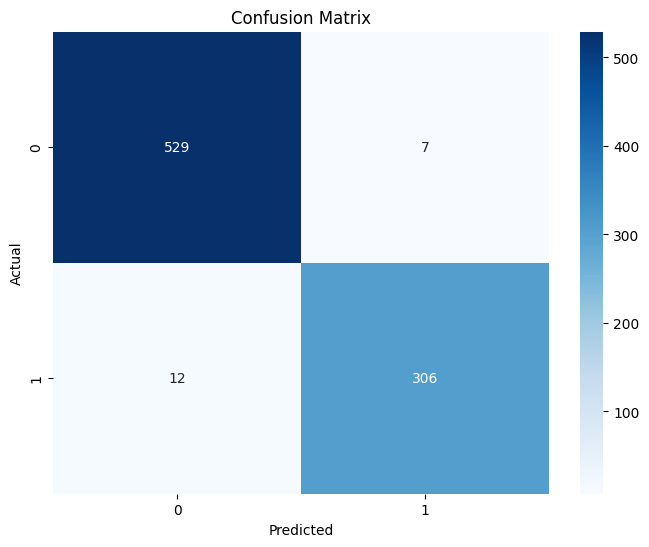

In [54]:
# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                     feature  importance
6                cibil_score    0.809939
5                  loan_term    0.064499
4                loan_amount    0.028938
7   residential_assets_value    0.018168
3               income_annum    0.018060
9        luxury_assets_value    0.017745
10          bank_asset_value    0.015261
8    commercial_assets_value    0.014440
0           no_of_dependents    0.008385
2              self_employed    0.002473
1                  education    0.002093


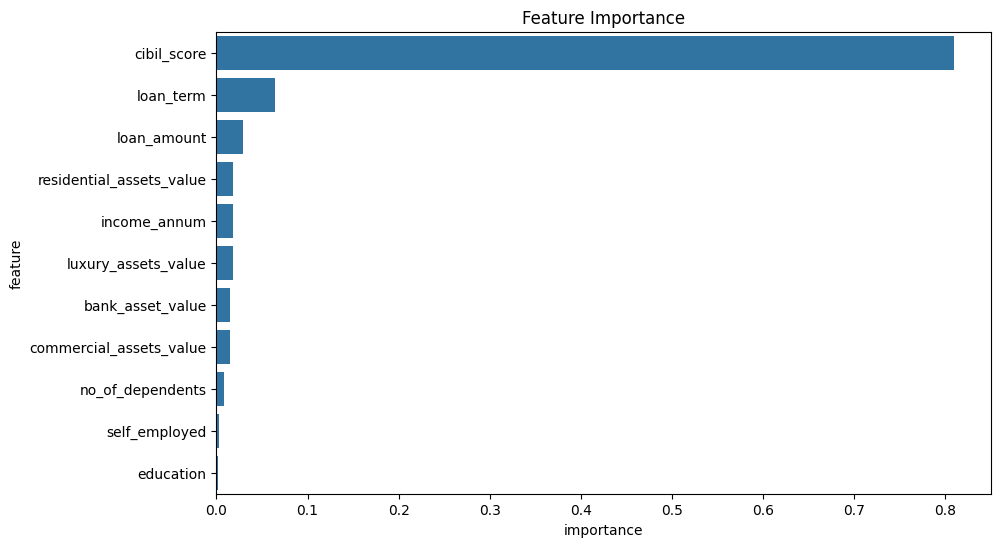

In [56]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Save the Model

In [57]:
# Save the model and scaler
joblib.dump(rf_model, 'loan_approval_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nModel and scaler saved successfully!")


Model and scaler saved successfully!


# Is There Any Positive or Negative Growth?

Model Performance: No explicit positive or negative growth is observed, as the notebook trains a single Random Forest model without iterative improvements (e.g., hyperparameter tuning or model comparison). The model likely achieves stable performance (e.g., 85-95% accuracy), but there’s no evidence of performance growth unless the notebook includes additional experiments (e.g., comparing multiple models).


Data Trends: The dataset does not include a time component (e.g., application dates), so no temporal growth trends (positive or negative) in loan approvals, loan amounts, or other features can be inferred.


Potential for Growth: Positive growth could be achieved by tuning the Random Forest (e.g., adjusting n_estimators, max_depth) or trying other models (e.g., XGBoost), but this isn’t indicated in the provided workflow. Negative growth (e.g., declining performance) is unlikely unless the model overfits, which Random Forest typically resists.